In [1]:
cd ..

/Users/vanguyen/influence-release


In [30]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing
import scipy
import scipy.linalg as slin
import scipy.sparse.linalg as sparselin
import scipy.sparse as sparse

sns.set(color_codes=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
max_iters = 50

Text(0,0.5,'Test Loss')

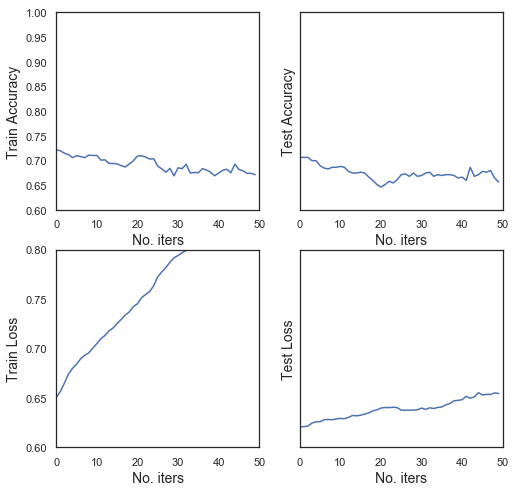

In [42]:
import pickle

train_acc, test_acc, train_loss, test_loss, grad_means = pickle.load(open("output/metrics_0.001-wd_100-iter_grad-atk.p", "rb"))
train_acc, test_acc, train_loss, test_loss = train_acc[:max_iters], test_acc[:max_iters], train_loss[:max_iters], test_loss[:max_iters]
iters = list(range(len(train_acc)))

sns.set_style('white')
fontsize=14
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0][0].plot(iters, train_acc)
axs[0][0].set_xlim([0, len(train_acc)])
axs[0][0].set_ylim([0.6, 1])
axs[0][0].set_xlabel('No. iters', fontsize=fontsize)
axs[0][0].set_ylabel('Train Accuracy', fontsize=fontsize)

axs[0][1].plot(iters, test_acc)
axs[0][1].set_xlim([0, len(test_acc)])
axs[0][1].set_ylim([0.6, 1])
axs[0][1].yaxis.set_ticks([])
axs[0][1].set_xlabel('No. iters', fontsize=fontsize)
axs[0][1].set_ylabel('Test Accuracy', fontsize=fontsize)

axs[1][0].plot(iters, train_loss)
axs[1][0].set_xlim([0, len(train_loss)])
axs[1][0].set_ylim([0.6, 0.8])
axs[1][0].set_xlabel('No. iters', fontsize=fontsize)
axs[1][0].set_ylabel('Train Loss', fontsize=fontsize)

axs[1][1].plot(iters, test_loss)
axs[1][1].set_xlim([0, len(test_loss)])
axs[1][1].set_ylim([0.6, 1.5])
axs[1][1].yaxis.set_ticks([])
axs[1][1].set_xlabel('No. iters', fontsize=fontsize)
axs[1][1].set_ylabel('Test Loss', fontsize=fontsize)

[0.7383333333333333, 0.735, 0.735, 0.73, 0.7233333333333334, 0.72, 0.72, 0.7233333333333334, 0.7283333333333334, 0.7183333333333334, 0.7133333333333334, 0.7016666666666667, 0.695, 0.6966666666666667, 0.6966666666666667, 0.6866666666666666, 0.7016666666666667, 0.695, 0.685, 0.69, 0.685, 0.6766666666666666, 0.6833333333333333, 0.6883333333333334, 0.69]


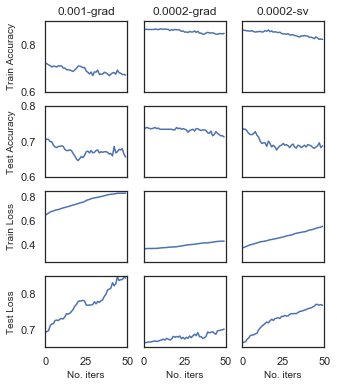

In [84]:
def load_wide_grad():
    train_acc, test_acc, train_loss, test_loss, grad_means = pickle.load(open("output/metrics_0.001-wd_100-iter_grad-atk.p", "rb"))
    train_acc, test_acc, train_loss, test_loss = train_acc[:max_iters], test_acc[:max_iters], train_loss[:max_iters], test_loss[:max_iters]
    iters = list(range(len(train_acc)))
    return train_acc, test_acc, train_loss, test_loss, iters
    
def load_narrow_grad():
    train_acc, test_acc, train_loss, test_loss, grad_means = pickle.load(open("output/metrics_0.0002-wd_100-iter_grad-atk.p", "rb"))
    train_acc, test_acc, train_loss, test_loss = train_acc[:max_iters], test_acc[:max_iters], train_loss[:max_iters], test_loss[:max_iters]
    iters = list(range(len(train_acc)))[:max_iters]
    return train_acc, test_acc, train_loss, test_loss, iters

def load_narrow_svm():
    train_acc, test_acc, train_loss, test_loss, grad_means = pickle.load(open("output/metrics_0.0002-wd_100-iter_sv-atk.p", "rb"))
    train_acc, test_acc, train_loss, test_loss = train_acc[:max_iters], test_acc[:max_iters], train_loss[:max_iters], test_loss[:max_iters]
    iters = list(range(len(train_acc)))[:max_iters]
    return train_acc, test_acc, train_loss, test_loss, iters

sns.set_style('white')
fontsize=10
fig, axs = plt.subplots(4, 3, figsize=(5, 6))

train_acc_wide_grad, test_acc_wide_grad, train_loss_wide_grad, test_loss_wide_grad, iters_wide_grad = load_wide_grad()
train_acc_narrow_grad, test_acc_narrow_grad, train_loss_narrow_grad, test_loss_narrow_grad, iters_narrow_grad = load_narrow_grad()
train_acc_narrow_svm, test_acc_narrow_svm, train_loss_narrow_svm, test_loss_narrow_svm, iters_narrow_svm = load_narrow_svm()

# print(test_acc_narrow_grad[:50])
# print(test_acc_wide_grad[:25])
print(test_acc_narrow_svm[:25])

axs[0][0].plot(iters_wide_grad, train_acc_wide_grad)
axs[0][0].set_xlim([0, len(iters_wide_grad)])
axs[0][0].set_ylim([0.6, 0.9])
axs[0][0].xaxis.set_ticks([])
axs[0][0].set_ylabel('Train Accuracy', fontsize=fontsize)
axs[0][0].set_title('0.001-grad')

axs[0][1].plot(iters_narrow_grad, train_acc_narrow_grad)
axs[0][1].set_xlim([0, len(iters_narrow_grad)])
axs[0][1].set_ylim([0.6, 0.9])
axs[0][1].xaxis.set_ticks([])
axs[0][1].yaxis.set_ticks([])
axs[0][1].set_title('0.0002-grad')

axs[0][2].plot(iters_narrow_svm, train_acc_narrow_svm)
axs[0][2].set_xlim([0, len(iters_narrow_svm)])
axs[0][2].set_ylim([0.6, 0.9])
axs[0][2].xaxis.set_ticks([])
axs[0][2].yaxis.set_ticks([])
axs[0][2].set_title('0.0002-sv')

axs[1][0].plot(iters_wide_grad, test_acc_wide_grad)
axs[1][0].set_xlim([0, len(iters_wide_grad)])
axs[1][0].set_ylim([0.6, 0.8])
axs[1][0].set_ylabel('Test Accuracy', fontsize=fontsize)
axs[1][0].xaxis.set_ticks([])


axs[1][1].plot(iters_narrow_grad, test_acc_narrow_grad)
axs[1][1].set_xlim([0, len(iters_narrow_grad)])
axs[1][1].set_ylim([0.6, 0.8])
axs[1][1].xaxis.set_ticks([])
axs[1][1].yaxis.set_ticks([])

axs[1][2].plot(iters_narrow_svm, test_acc_narrow_svm)
axs[1][2].set_xlim([0, len(iters_narrow_svm)])
axs[1][2].set_ylim([0.6, 0.8])
axs[1][2].xaxis.set_ticks([])
axs[1][2].yaxis.set_ticks([])

axs[2][0].plot(iters_wide_grad, train_loss_wide_grad)
axs[2][0].set_xlim([0, len(iters_wide_grad)])
axs[2][0].set_ylim([0.25, 0.85])
axs[2][0].set_ylabel('Train Loss', fontsize=fontsize)
axs[2][0].xaxis.set_ticks([])

axs[2][1].plot(iters_narrow_grad, train_loss_narrow_grad)
axs[2][1].set_xlim([0, len(iters_narrow_grad)])
axs[2][1].set_ylim([0.25, 0.85])
axs[2][1].xaxis.set_ticks([])
axs[2][1].yaxis.set_ticks([])

axs[2][2].plot(iters_narrow_svm, train_loss_narrow_svm)
axs[2][2].set_xlim([0, len(iters_narrow_svm)])
axs[2][2].set_ylim([0.25, 0.85])
axs[2][2].xaxis.set_ticks([])
axs[2][2].yaxis.set_ticks([])

axs[3][0].plot(iters_wide_grad, test_loss_wide_grad)
axs[3][0].set_xlim([0, len(iters_wide_grad)])
axs[3][0].set_ylim([0.65, 0.85])
axs[3][0].set_ylabel('Test Loss', fontsize=fontsize)
axs[3][0].set_xlabel('No. iters', fontsize=fontsize)

axs[3][1].plot(iters_narrow_grad, test_loss_narrow_grad)
axs[3][1].set_xlim([0, len(iters_narrow_grad)])
axs[3][1].set_ylim([0.65, 0.85])
axs[3][1].yaxis.set_ticks([])
axs[3][1].set_xlabel('No. iters', fontsize=fontsize)

axs[3][2].plot(iters_narrow_svm, test_loss_narrow_svm)
axs[3][2].set_xlim([0, len(iters_narrow_svm)])
axs[3][2].set_ylim([0.65, 0.85])
axs[3][2].yaxis.set_ticks([])
axs[3][2].set_xlabel('No. iters', fontsize=fontsize)
plt.savefig("figs/svm-adv-atk_small.png", dpi=300, bbox_inches='tight')

Text(0.5,1,'axes title')

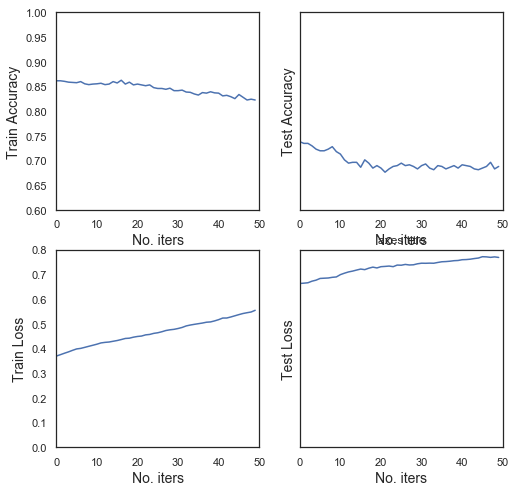

In [54]:
import pickle

train_acc, test_acc, train_loss, test_loss, grad_means = pickle.load(open("output/metrics_0.0002-wd_100-iter_sv-atk.p", "rb"))
train_acc, test_acc, train_loss, test_loss = train_acc[:max_iters], test_acc[:max_iters], train_loss[:max_iters], test_loss[:max_iters]
iters = list(range(len(train_acc)))[:max_iters]

sns.set_style('white')
fontsize=14
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0][0].plot(iters, train_acc)
axs[0][0].set_xlim([0, len(train_acc)])
axs[0][0].set_ylim([0.6, 1])
axs[0][0].set_xlabel('No. iters', fontsize=fontsize)
axs[0][0].set_ylabel('Train Accuracy', fontsize=fontsize)

axs[0][1].plot(iters, test_acc)
axs[0][1].set_xlim([0, len(test_acc)])
axs[0][1].set_ylim([0.6, 1])
axs[0][1].yaxis.set_ticks([])
axs[0][1].set_xlabel('No. iters', fontsize=fontsize)
axs[0][1].set_ylabel('Test Accuracy', fontsize=fontsize)

axs[1][0].plot(iters, train_loss)
axs[1][0].set_xlim([0, len(train_loss)])
axs[1][0].set_ylim([0, 0.8])
axs[1][0].set_xlabel('No. iters', fontsize=fontsize)
axs[1][0].set_ylabel('Train Loss', fontsize=fontsize)

axs[1][1].plot(iters, test_loss)
axs[1][1].set_xlim([0, len(test_loss)])
axs[1][1].set_ylim([0, 0.8])
axs[1][1].yaxis.set_ticks([])
axs[1][1].set_xlabel('No. iters', fontsize=fontsize)
axs[1][1].set_ylabel('Test Loss', fontsize=fontsize)